# Titanic: Machine Learning from Disaster

#### Author: Andraes Röckert

## Introduction

This is my attempt at solving the machine learnig challenge of predicting who will survive the sinking of the unsinkable Titanic. The challenge is found at https://www.kaggle.com/c/titanic where in depth information of the challenge along with the necessary is found.

In the notebook I will perform the following steps to produce my prediction:
*  Define the problem
* Gather the data
* Prepare data for analysis
* Explore the data
* Model data
* Validate and implement data model
* Communicate results

## Define the Problem

In this challenge the aim is to predict which passenger of the Titanic will survive and who will not. I believe most people have seen the movie Titanic from 1997, featuring a Leonardo DiCaprio and stunning Kate Winslet, or heard stories about the chivalry of the gentlemen onboard the sinking ship, evacuating women and children on the limited life boats. Is this an accurate depiction? Let's find out together. Let us also try making a prediction based of the available data.

To make this prediction we are handed a set of information of the passengers. This bundle of information features the passengers Name, Passenger Class, Sex, Age, Number of Siblings, Number of Parents and Children, Ticket number, Ticket Fare, Cabin Number and Port of Departure. The data is also subdivied into a training set, in which we are given who survives and who does not, and a validation set where this information is not available. The later is the set in which we will predict the rate of survival and enter the challenge with.

As we want to predict if they survive or not, a binary question, we regard this as a classification problem. We are also handed a key in which we can train our model with making it a supervised classification problem.

In this notebook we will utilize python along with a number of python libraries to do the heavy lifting of all parts of this notebook. Let us firstly configure our environment and present the version of key programs and libraries to ensure reproducibility. Here we focus on the use of pandas to handle the data and scikit-learn to perform all machine learning related tasks.

In [1]:
import sys # access to system parameters
print('Python version: {}'.format(sys.version))

import pandas as pd # library of functions for data processing
print('pandas version: {}'.format(pd.__version__))

import matplotlib # functions for visualization
print('matplotlib version: {}'.format(matplotlib.__version__))

import numpy as np # package for scientific computing
print('NumPy version: {}'.format(np.__version__))

import scipy as sp # functions for scientific computing and advanced mathematics
print('SciPy version: {}'.format(sp.__version__))

import IPython.display
from IPython import display # printing fancy in Jupyter notebook
print('IPython version: {}'.format(IPython.__version__))

import sklearn # collection of machine learning algorithms
print('scikit-learn version: {}'.format(sklearn.__version__))

# Some additional nifty functions
import re
import random
import time

import warnings
warnings.filterwarnings('ignore')

# Model algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process, neural_network

# Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

#Configure visualization defaults
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

Python version: 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
pandas version: 0.22.0
matplotlib version: 2.1.0
NumPy version: 1.14.0
SciPy version: 1.0.0
IPython version: 6.2.1
scikit-learn version: 0.19.1


## Gather Data

The data is downloaded from https://www.kaggle.com/c/titanic/data and simply stored in a folder named data. Here the data is already neatly subdivided into a training set which we use to investigate our data and a test set, we call the validation set from now on, containing the data which we make our prediction on. The data in the training set will be used to investigate our data and to train and test our machine learning model.

As we follow this challenge the gathering of data is trivial, no need to broaden our scope to look for more data.

In [2]:
# Data for visualizations, training and testing
data = pd.read_csv('data/train.csv')

# Data for validation
data_val = pd.read_csv('data/test.csv')

# For cleaning purposes it is simple to group all dataframes in a list
data_cleaning = [data, data_val]

# For analysis of distributions of some features it is convernient to concatenate the two dataframes
data_conc = pd.concat(data_cleaning)

## Prepare Data for Analysis

If we start by visualizing what our datafiles contains, we can grasp their contents.

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print('Training data: \n')
print(data.info())
print('\n','-'*25,'\n')
print('Validation data: \n')
print(data_val.info())

Training data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None

 ------------------------- 

Validation data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int

Above we can see that we have a mix of integer (int64), floating point (float64) and string (object) values in our dataframe. Although each column seem to bee neatly organized to contain one type. One thing to note is that we are missing entries in some features. Let's explore this further.

In [5]:
print('Training data with null values: \n',data.isnull().sum())
print('\n','-'*25,'\n')
print('Valudation data with null values: \n',data_val.isnull().sum())

Training data with null values: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 ------------------------- 

Valudation data with null values: 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


We are missing information about the Age of many passengers. Let's visualize this feature using the concatenated data (both testing and validation dataframes).

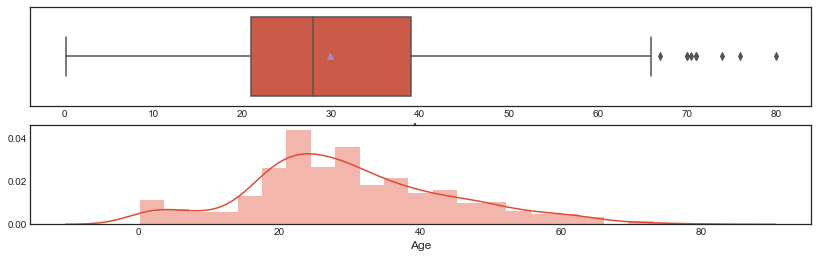

In [6]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(14,4))
    
sns.boxplot(data_conc[data_conc['Age'].notnull()]['Age'],showmeans=True, ax = ax1)
sns.distplot(data_conc[data_conc['Age'].notnull()]['Age'], ax = ax2)

As we observ several outliers in the regime of old people as we do not see in young people we can assume that the mean value will not be the same as the median value (compare vertical line in red box with the blue triangle). Judging from the ammount of outliers on the high side, compared to the low side we choose to use the median as a good approximation for those values that are missing.

In the training data set we can see that we are missing two entries for the port of departure. We can assume these embarked at the port where most people did.

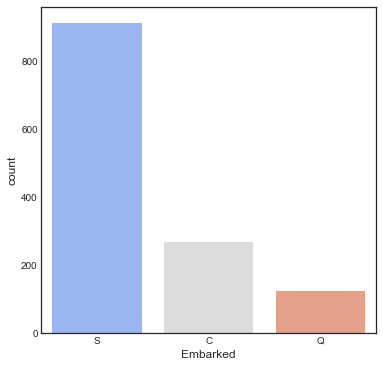

In [7]:
fig, ax = plt.subplots(1,1,figsize = (6,6))

sns.countplot(x='Embarked',data=data_conc,palette = 'coolwarm')

One passengers fare was not registered.

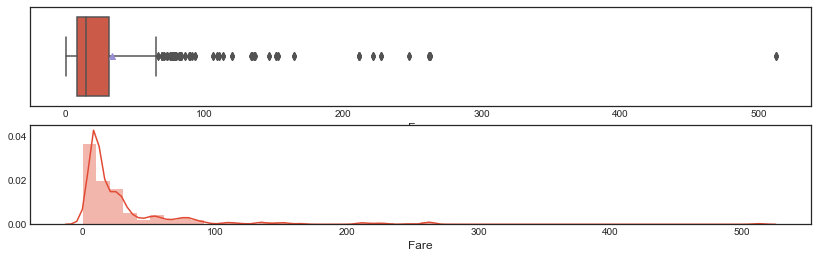

In [8]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(14,4))
    
sns.boxplot(data_conc[data_conc['Fare'].notnull()]['Fare'],showmeans=True, ax = ax1)
sns.distplot(data_conc[data_conc['Fare'].notnull()]['Fare'], ax = ax2)

In this case we see an extemely scewed set of data were the median and mean are not close to each other. In this case the medan is a far more resonable descriptior of the cost of fare for an unknown passenger. In the next frame we insert the missing data.

In [9]:
for df in data_cleaning:
    
    # Complete the missing Age datavalues with the median of the Age
    df['Age'].fillna(data_conc['Age'].median(),inplace=True)
    
    # Complete the missig Embarked with the most common port of departure
    df['Embarked'].fillna(data_conc['Embarked'].mode()[0],inplace=True)
    
    # Complete the missing Fare with the median of the Fare
    df['Fare'].fillna(data_conc['Fare'].median(),inplace=True)

Time for a new look at the dataframes. At this point the only dataframe containing null values is the Cabin feature.

In [10]:
print('Training data with null values: \n',data.isnull().sum())
print('\n','-'*25,'\n')
print('Valudation data with null values: \n',data_val.isnull().sum())

Training data with null values: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

 ------------------------- 

Valudation data with null values: 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


The dataframes are now completed with data. It is now time to create new features and convert eventual values from features into new features

In [11]:
print(data_conc['Cabin'].sample(10))

405    D38
634    NaN
4      NaN
379    NaN
282    NaN
746    NaN
19     NaN
95     NaN
361    NaN
78     NaN
Name: Cabin, dtype: object


Looking at the Cabin feature we gain information about the deck the passangers stayed at and their room number. But the majority of the passanger did not have a room it seems, or is this information just missing? Let's assume they did not have a cabin and put that as an addidional deck.

In [12]:
for df in data_cleaning:
    df['Deck'] = df[df['Cabin'].notnull()]['Cabin'].astype(str).str[0]
    df['Deck'].fillna('N',inplace=True)

Text(0.5,1,'validation')

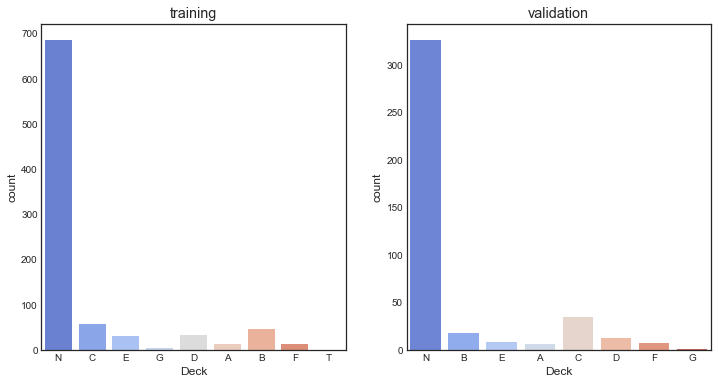

In [13]:
fig, ax = plt.subplots(1,2,figsize = (12,6))

sns.countplot(x='Deck' ,data=data, ax = ax[0],palette = 'coolwarm')
ax[0].set_title('training')
sns.countplot(x='Deck' ,data=data_val, ax = ax[1],palette = 'coolwarm')
ax[1].set_title('validation')

Hmm... This does not look to interesting... Maybe the cabin information is surplous. It looks as if we are missing large portions of information. Many of the groups only contain a samll ammount of occurances making it non-ideal to use in our model. A descripor could be HaveCabin which would only take in to accont if they have a cabin or not.

In [14]:
for df in data_cleaning:
    df['NoCabin'] = df['Deck'] == 'N'
    df['NoCabin'] = (df['NoCabin'] == True).astype(int)

Text(0.5,1,'validation')

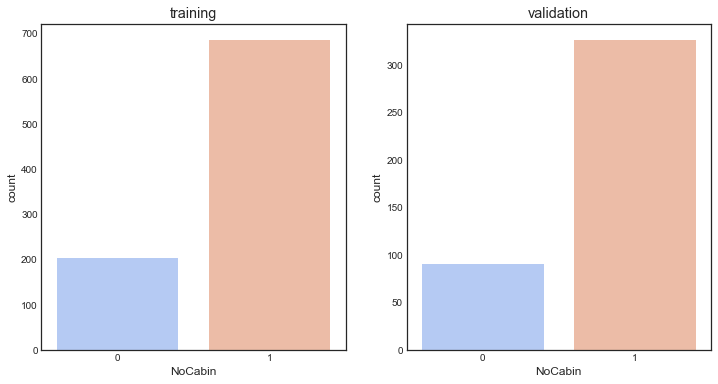

In [15]:
fig, ax = plt.subplots(1,2,figsize = (12,6))

sns.countplot(x='NoCabin', data=data, ax = ax[0],palette = 'coolwarm')
ax[0].set_title('training')
sns.countplot(x='NoCabin' ,data=data_val, ax = ax[1],palette = 'coolwarm')
ax[1].set_title('validation')

Let us change our focus. What about the size of families of the ship. We have two categories, SibSp containing an integer value of the number of siblings and spouses along with the Parch containing an integer value of the numbre of parents and children on the boat. The family size is then SibSp + Parch + 1.

In [16]:
for df in data_cleaning:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

Text(0.5,1,'validation')

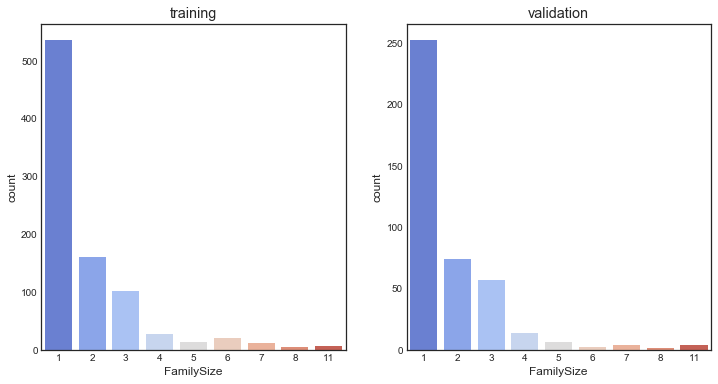

In [17]:
fig, ax = plt.subplots(1,2,figsize = (12,6))

sns.countplot(x='FamilySize' ,data=data, ax = ax[0],palette = 'coolwarm')
ax[0].set_title('training')
sns.countplot(x='FamilySize' ,data=data_val, ax = ax[1],palette = 'coolwarm')
ax[1].set_title('validation')

What about the names. Can we extract some information from the names? Let us look at a sample of the names.

In [18]:
data_conc['Name'].sample(10)

885               Rice, Mrs. William (Margaret Norton)
48                                 Samaan, Mr. Youssef
482                           Rouse, Mr. Richard Henry
656                              Radeff, Mr. Alexander
624                        Bowen, Mr. David John "Dai"
278                               Ware, Mr. John James
702                              Barbara, Miss. Saiide
577          Silvey, Mrs. William Baird (Alice Munger)
24     Ryerson, Mrs. Arthur Larned (Emily Maria Borie)
280                                   Duane, Mr. Frank
Name: Name, dtype: object

It looks as if the titles of our passengers are found after the comma sign in all these entries. In the entire dataset we find the following names and counts. Let's group all infrequent titles as a Misc-title. Although maybe a manual cleaning where Mlle (mademoiselle), Mme (madame), ms (miss) would be grouped into some suitable group would be appropritate.

In [19]:
title_names = data_conc['Name'].str.split(", ",expand=True)[1].str.split(".",expand=True)[0].value_counts()
print(title_names)
title_names_mask = title_names < 10

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Mlle              2
Major             2
Lady              1
Sir               1
the Countess      1
Dona              1
Jonkheer          1
Mme               1
Don               1
Capt              1
Name: 0, dtype: int64


In [20]:
for df in data_cleaning:
    df['Title'] = df['Name'].str.split(", ",expand=True)[1].str.split(".",expand=True)[0]
    df['Title'] = df['Title'].apply(lambda x: 'Misc' if title_names_mask.loc[x] == True else x)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Deck           891 non-null object
NoCabin        891 non-null int32
FamilySize     891 non-null int64
Title          891 non-null object
dtypes: float64(2), int32(1), int64(6), object(7)
memory usage: 108.0+ KB


As a last measure we can to encode the object data (strings) to integer values for the mathematical methods to interpret. The rest we can drop now.

In [22]:
#drop_column = ['PassengerId','Cabin','Ticket','Name', 'Cabin']
for df in data_cleaning:
    df['Sex_code'] = LabelEncoder().fit_transform(df['Sex'])
    df['Title_code'] = LabelEncoder().fit_transform(df['Title'])
    df['Embarked_code'] = LabelEncoder().fit_transform(df['Embarked'])
    df['Deck_code'] = LabelEncoder().fit_transform(df['Deck'])
    #try:
    #    df.drop(drop_column,axis=1,inplace=True)
    #    break
    #except ValueError:
    #    print('You probably already dropped these tables')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
PassengerId      891 non-null int64
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Ticket           891 non-null object
Fare             891 non-null float64
Cabin            204 non-null object
Embarked         891 non-null object
Deck             891 non-null object
NoCabin          891 non-null int32
FamilySize       891 non-null int64
Title            891 non-null object
Sex_code         891 non-null int64
Title_code       891 non-null int64
Embarked_code    891 non-null int64
Deck_code        891 non-null int64
dtypes: float64(2), int32(1), int64(10), object(7)
memory usage: 135.8+ KB


## Explore the data

Now that we have prepared the data for analysis let us take a look at the data distribution and eventual relations between our features and the rate of survival.

Firstly  we simply look at the correlation between between our features and the survival rate.

In [24]:
for x in data.loc[:,['Pclass','Sex','Deck','SibSp','Parch', 'Embarked', 'NoCabin', 'FamilySize', 'Title']] :
    print('Survival Correlation by:',x)
    print(data[[x, 'Survived']].groupby(x, as_index=False).mean())
    print('-'*25,'\n')

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
------------------------- 

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
------------------------- 

Survival Correlation by: Deck
  Deck  Survived
0    A  0.466667
1    B  0.744681
2    C  0.593220
3    D  0.757576
4    E  0.750000
5    F  0.615385
6    G  0.500000
7    N  0.299854
8    T  0.000000
------------------------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
------------------------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
------------------------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389

From the data we can se that it seems to have been benefitial to be a woman and of a higher passanger class. Although it is very difficult to actually visualize combinations of factors. Let's vizualize the data.

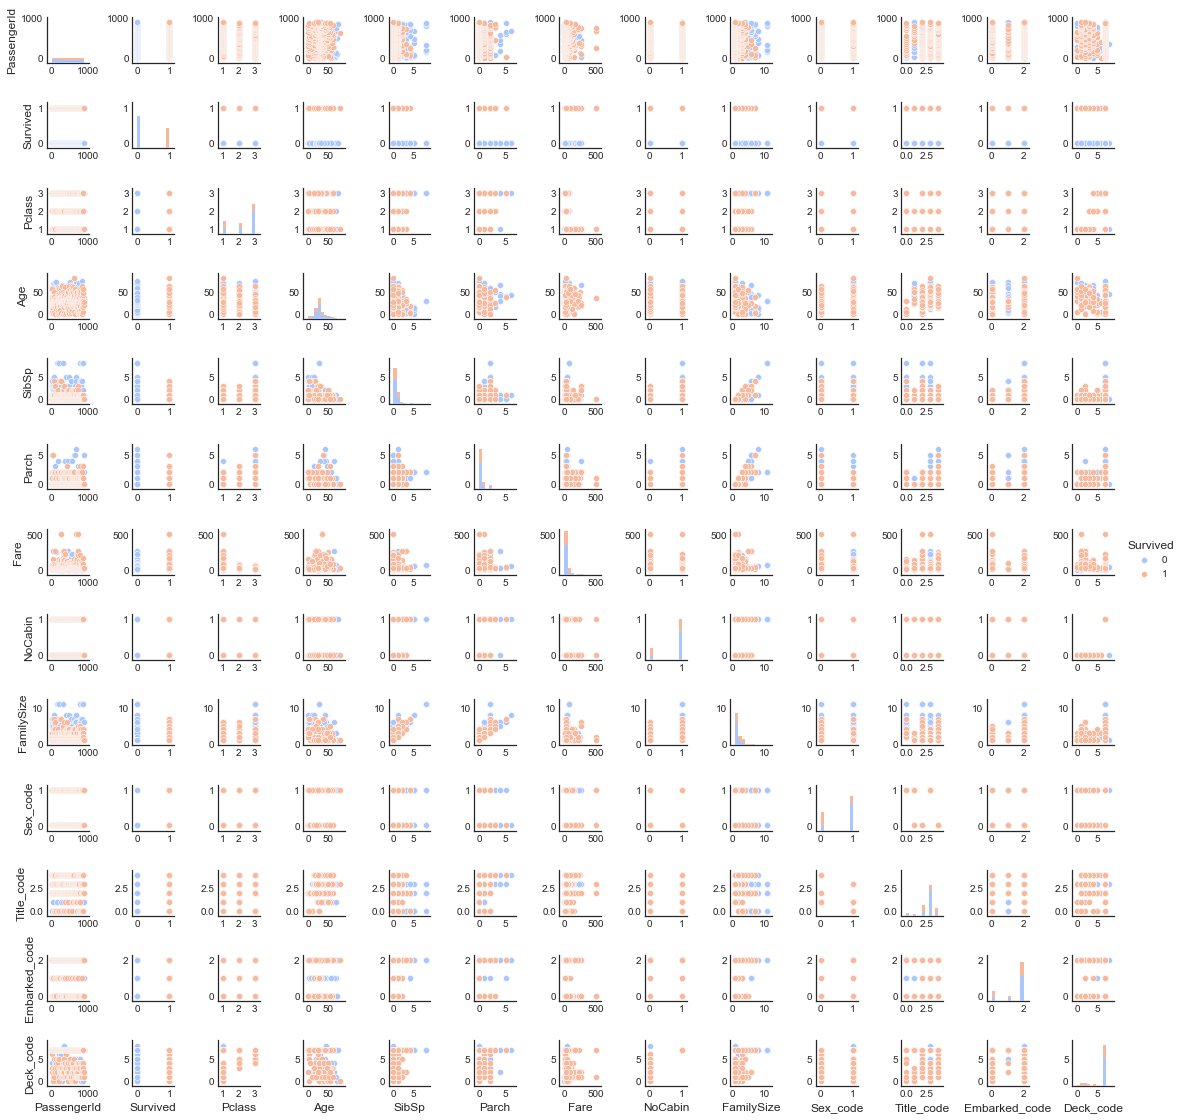

In [25]:
pp = sns.pairplot(data, hue = 'Survived', palette = 'coolwarm', size = 1.2, 
                  diag_kind='hist')

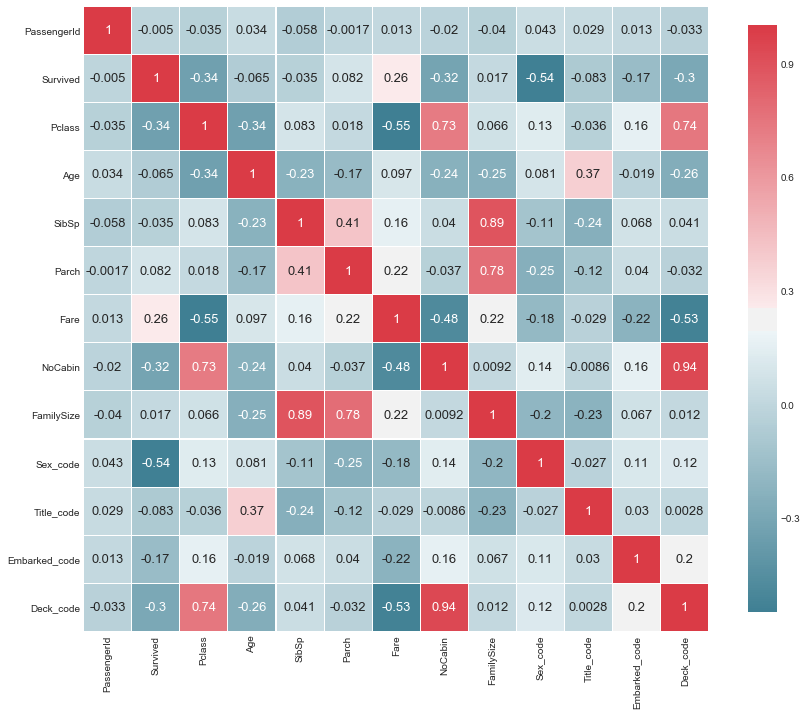

In [26]:
_, ax = plt.subplots(figsize=(14,12))
colormap = sns.diverging_palette(220,10,as_cmap=True)

_ = sns.heatmap(
    data.corr(),
    cmap = colormap,
    square = True,
    cbar_kws = {'shrink':.9},
    ax = ax,
    annot = True,
    linewidths = 0.1,
    vmax = 1.0,
    linecolor = 'white',
    annot_kws = {'fontsize':13}
)

Now we see two large figures filled to the brim with data. The top one shows scatter plots of all numerical variables with a histogram of the data distribution on the diagonal. The bottom one shows the pearson correlation coefficient which displays a measure of the correlation with the absolute number but also show if it is a positive or negative correlation by its sign.

From these figures we can see that the survival rate (follow the leftmost column) correlate to 1 with itself (as expected) but show high absolute correlations with class, Fare, Sex and Deck. We also see other correlations, FamiltySize correlate highly with both SibSp and Parch (sic!), and Fare correlate with Pclass, Title also correlate with Age, Deck and Pclass. It seems there are more interesting correlations to explore.

Text(0.5,1,'Sex vs Age')

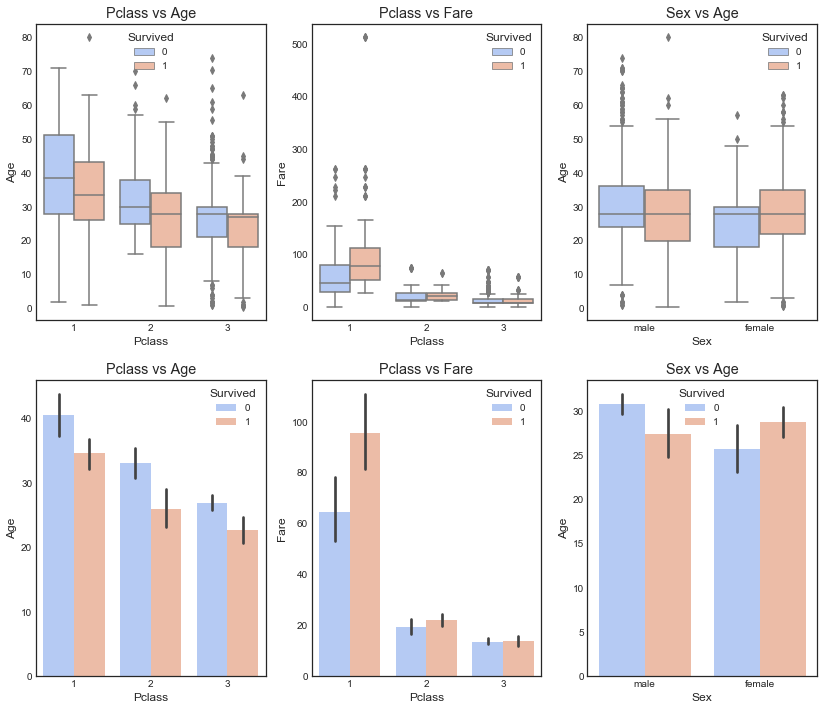

In [27]:
# plot fare vs class
fig, ax = plt.subplots(2,3,figsize=(14,12))

sns.boxplot(x='Pclass', y = 'Age', hue = 'Survived', data = data, ax = ax[0,0], palette = 'coolwarm')
ax[0,0].set_title('Pclass vs Age')
sns.boxplot(x='Pclass', y = 'Fare', hue = 'Survived', data = data, ax = ax[0,1], palette = 'coolwarm')
ax[0,1].set_title('Pclass vs Fare')
sns.boxplot(x='Sex', y = 'Age', hue = 'Survived', data = data, ax = ax[0,2], palette = 'coolwarm')
ax[0,2].set_title('Sex vs Age')

sns.barplot(x='Pclass', y = 'Age', hue = 'Survived', data = data, ax = ax[1,0], palette = 'coolwarm')
ax[1,0].set_title('Pclass vs Age')
sns.barplot(x='Pclass', y = 'Fare', hue = 'Survived', data = data, ax = ax[1,1], palette = 'coolwarm')
ax[1,1].set_title('Pclass vs Fare')
sns.barplot(x='Sex', y = 'Age', hue = 'Survived', data = data, ax = ax[1,2], palette = 'coolwarm')
ax[1,2].set_title('Sex vs Age')


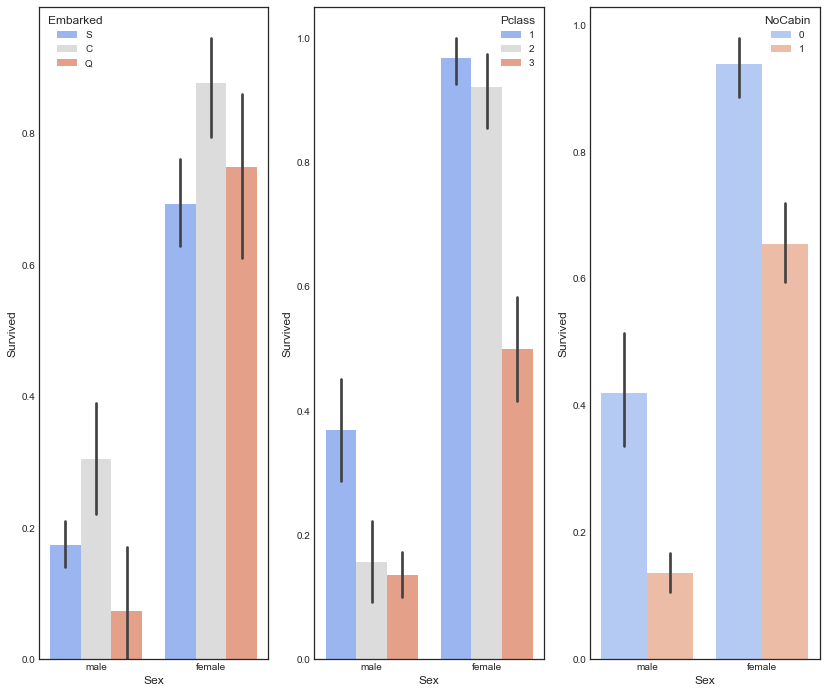

In [28]:
fig, ax = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=data, ax = ax[0], palette = 'coolwarm')
#qaxis[0,0].set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=data, ax = ax[1], palette = 'coolwarm')
#qaxis[0,1].set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'NoCabin', data=data, ax = ax[2], palette = 'coolwarm')
#qaxis[0,2].set_title('Sex vs IsAlone Survival Comparison')

From these data is seems that many of the variables have a large covariance. This can adversely affect our predictoin as errors in feature can get enhanced if the same error is found in several features.

Just for fun, let's look at a feature with low correlation to the survival rate.

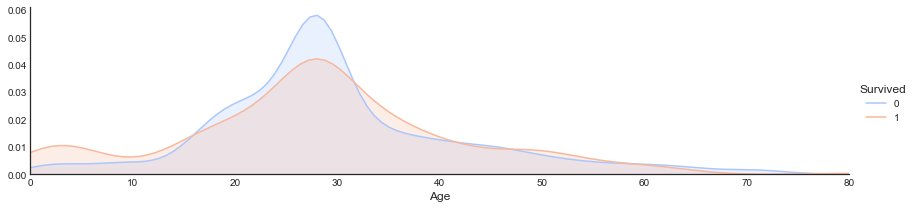

In [29]:
age = sns.FacetGrid(data = data, hue = 'Survived', palette ='coolwarm', aspect=4)
age.map(sns.kdeplot, 'Age', shade='True')
age.set(xlim=(0,data['Age'].max()))
age.add_legend()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
PassengerId      891 non-null int64
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Ticket           891 non-null object
Fare             891 non-null float64
Cabin            204 non-null object
Embarked         891 non-null object
Deck             891 non-null object
NoCabin          891 non-null int32
FamilySize       891 non-null int64
Title            891 non-null object
Sex_code         891 non-null int64
Title_code       891 non-null int64
Embarked_code    891 non-null int64
Deck_code        891 non-null int64
dtypes: float64(2), int32(1), int64(10), object(7)
memory usage: 135.8+ KB


Text(0.5,1,'PCA 2 vs PCA 3')

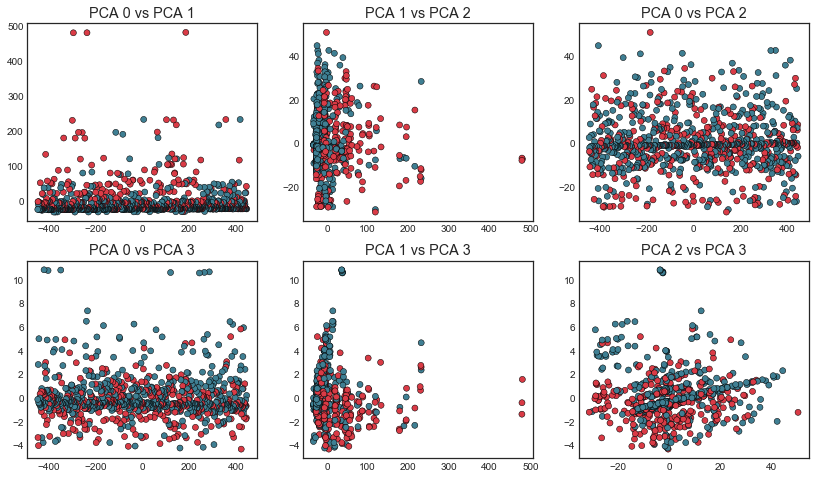

In [31]:
from sklearn import decomposition
colormap = sns.diverging_palette(220,10,as_cmap=True)

fig, ax = plt.subplots(2,3, figsize=(14, 8))
#plt.clf()
#plt.cla()
pca = decomposition.PCA(n_components=4)
pca.fit(data.select_dtypes(exclude=object))
X_PCA = pca.transform(data.select_dtypes(exclude=object))

ax[0,0].scatter(X_PCA[:, 0], X_PCA[:, 1], c=data['Survived'], edgecolor='k',cmap=plt.get_cmap(colormap))
ax[0,0].set_title('PCA 0 vs PCA 1')
ax[0,1].scatter(X_PCA[:, 1], X_PCA[:, 2], c=data['Survived'], edgecolor='k',cmap=plt.get_cmap(colormap))
ax[0,1].set_title('PCA 1 vs PCA 2')
ax[0,2].scatter(X_PCA[:, 0], X_PCA[:, 2], c=data['Survived'], edgecolor='k',cmap=plt.get_cmap(colormap))
ax[0,2].set_title('PCA 0 vs PCA 2')
ax[1,0].scatter(X_PCA[:, 0], X_PCA[:, 3], c=data['Survived'], edgecolor='k',cmap=plt.get_cmap(colormap))
ax[1,0].set_title('PCA 0 vs PCA 3')
ax[1,1].scatter(X_PCA[:, 1], X_PCA[:, 3], c=data['Survived'], edgecolor='k',cmap=plt.get_cmap(colormap))
ax[1,1].set_title('PCA 1 vs PCA 3')
ax[1,2].scatter(X_PCA[:, 2], X_PCA[:, 3], c=data['Survived'], edgecolor='k',cmap=plt.get_cmap(colormap))
ax[1,2].set_title('PCA 2 vs PCA 3')
#ax.set_legend()

From the above PCA plot we try to find the four principle components displaying the largest variance. Unfortunately there is no distinguishable classes in these groups, soley from these plots we cannot determine who survives and who does not. Thus we need some sort of algorithm to do this work for us.

## Model the Data

Now we have finally reached the machine learning part. As we have a supervised classification problem a suitable algorithm is preferably chosen. But which? Let's just try all of them to see if we find a suitable one. (Wasteful, right?)

We start by removing the columns with non digit values and save our features and target variables.

In [32]:
eval_titles = data.select_dtypes(exclude=object).columns
Target = eval_titles[1]
Features = eval_titles[2:]

Next we choose a set of machine learning algorithms which we think are suitable for the problem and compare them. In this case a selection of algorithms suitable for solving supervised classification problems were chosen.

In [33]:
MLA = [
    # Neural Network
    neural_network.MLPClassifier(),
    
    # Ensemble Methods
    ensemble.RandomForestClassifier(),
    ensemble.ExtraTreesClassifier(),
    
    # Gaussian Process
    gaussian_process.GaussianProcessClassifier(),
    
    # Generalized Learning Models
    linear_model.LogisticRegressionCV(),
    linear_model.RidgeClassifierCV(),
    linear_model.Perceptron(),
    
    # Naive Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    # Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    # Support Vector Machines
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    
    # Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
]


Now we train and fit machine learning models to the data. This is done in such a way as to use as much of the data as possible. Were we chunk the data into 60 % training data, 30 % testing data and 10 % data we do not use in which we train and fit our model. This is done 20 times in parallel to use our data as essifiently as possible. Each algorithm is then evaluated by the mean training accuracy and standard deviation.

In [34]:
# Split dataset into cross validation sets
cv_split = model_selection.ShuffleSplit(n_splits = 20,
                                        test_size =0.3,
                                        train_size=0.6,
                                        random_state=0                                    
                                       )

MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Train Accuracy Mean',
              'MLA Test Accuracy Mean', 'MLA Train Accuracy 3*STD',
               'MLA Test Accuracy 3*STD', 'MLA Time'
              ]
MLA_compare = pd.DataFrame(columns = MLA_columns)

# create table to compare MLA predictions
MLA_predict = pd.DataFrame()

#index through MLA and save performance to table
row_index = 0
for alg in MLA:
    
    # set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    # score model with cross validation
    cv_results = model_selection.cross_validate(alg, 
                                                data[Features], 
                                                data[Target], 
                                                cv = cv_split
                                               )
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy 3*STD'] = cv_results['train_score'].std()*3
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3
    
    alg.fit(data[Features], data[Target])
    MLA_predict[MLA_name] = alg.predict(data[Features])
    
    row_index+=1

Text(0,0.5,'Algorithm')

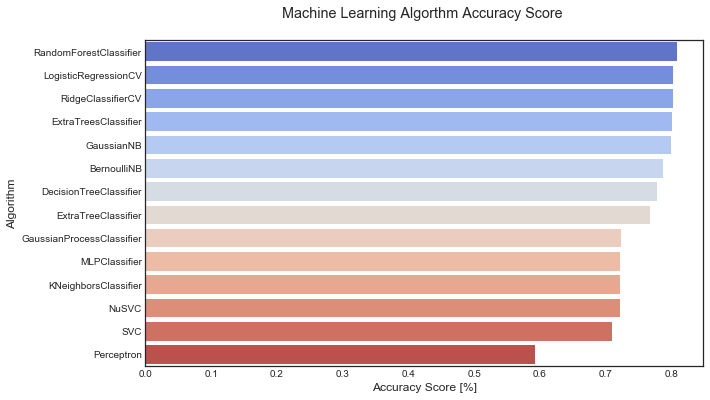

In [35]:
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)

plt.subplots(1,1, figsize=(10, 6))
sns.barplot(x = 'MLA Test Accuracy Mean', 
            y = 'MLA Name',
            data = MLA_compare, 
            palette = 'coolwarm'
           )
plt.title('Machine Learning Algorthm Accuracy Score \n')
plt.xlabel('Accuracy Score [%]')
plt.ylabel('Algorithm')

It seems the RandomForestClassifier performs the best on the mean test accuracy. Let's continue to optimize the algorithm to get the best performance from it. We do this by mapping over a parameter grid and choosing the settings with the most accurate prediction.

In [36]:
alg = ensemble.RandomForestClassifier()
base_results = model_selection.cross_validate(alg,
                                              data[Features], 
                                              data[Target],
                                              cv = cv_split)
alg.fit(data[Features],data[Target])

print('Original Random Forest Parameters: ', alg.get_params())
print('Original Random Forest Training w/bin score mean {:.2f} %'.format(base_results['train_score'].mean()*100))
print('Original Random Forest Test w/bin score mean {:.2f} %'.format(base_results['test_score'].mean()*100))
print('Original Random Forest Test w/bin 3*STD {:.2f} %'.format(base_results['train_score'].std()*100*3))

print('-'*25)

# tune hyper parameters
param_grid = {#'bootstrap': True, 
              #'class_weight': None, 
              #'criterion': ['gini','entropy'], 
              #'max_depth': [None,1,2,3,4,5,6,7,8,9,10,11,12],
              'max_depth': [None],
              #'max_features': 'auto', 
              #'max_leaf_nodes': None, 
              #'min_impurity_decrease': 0.0, 
              #'min_impurity_split': None, 
              'min_samples_leaf': [1,2,3,4,5,7,8],
              #'min_samples_leaf': [2], 
              #'min_samples_split': 2, 
              #'min_weight_fraction_leaf': 0.0, 
              #'n_estimators': [5,6,7,8,9,10,11,12,20,30,50,70,100],
              'n_estimators': [120,130,140,150,160,170,180,190],
              #'n_jobs': [1,3,5], 
              #'oob_score': False, 
              'random_state': [0], 
              #'verbose': 0, 
              #'warm_start': False
             }

tune_model = model_selection.GridSearchCV(alg,
                                          param_grid = param_grid,
                                          scoring = 'roc_auc',
                                          cv = cv_split,
                                         )
tune_model.fit(data[Features], data[Target])

print('Optimized Random Forest Parameters: ', tune_model.best_params_)
print('Optimized Random Forest Training w/bin score mean: {:.2f} %'.format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print('Optimized Random Forest Test w/bin score mean: {:.2f} %'.format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('Optimized Random Forest Test w/bin score 3*STD: {:.2f} %'.format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100))

print('-'*25)

Original Random Forest Parameters:  {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': 1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Original Random Forest Training w/bin score mean 97.20 %
Original Random Forest Test w/bin score mean 80.75 %
Original Random Forest Test w/bin 3*STD 1.79 %
-------------------------
Optimized Random Forest Parameters:  {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 170, 'random_state': 0}
Optimized Random Forest Training w/bin score mean: 97.77 %
Optimized Random Forest Test w/bin score mean: 87.88 %
Optimized Random Forest Test w/bin score 3*STD: 2.31 %
-------------------------


With our new optimal settings we fit the RandomForestClassifier to the training data one again and predict which passengers would survive and who would not.

In [37]:
alg = ensemble.RandomForestClassifier(max_depth=None, min_samples_leaf = 2, n_estimators = 170, random_state = 0)
alg.fit(data[Features], data[Target])
data_val['Survived'] = alg.predict(data_val[Features])

In [38]:
submit = data_val[['PassengerId','Survived']]
submit.to_csv('submission/submit.csv', index=False)

print(submit.sample(10))

     PassengerId  Survived
292         1184         0
408         1300         1
187         1079         0
95           987         0
172         1064         0
271         1163         0
169         1061         0
401         1293         0
386         1278         0
239         1131         1


The submission yielded a 78.95 % accuracy, significantly lower than that of the training and test set. I believe the model might have been to overfitted.

Let's find out what features were the most important in the selection.

Text(0.5,0,'Feature Importance to Classification [%]')

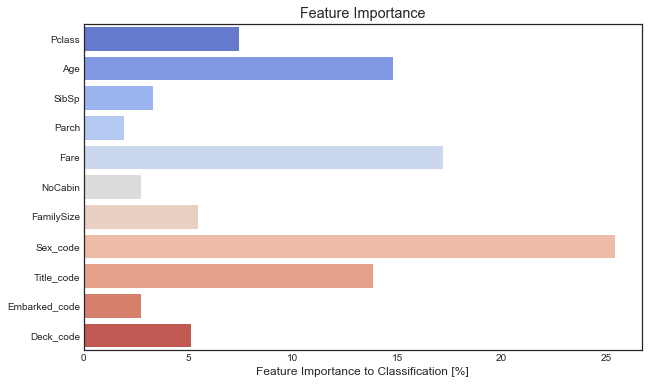

In [39]:
fig, ax = plt.subplots(1,1,figsize=(10,6))

sns.barplot(y = Features, x = alg.feature_importances_*100, palette = 'coolwarm')
ax.set_title('Feature Importance')
ax.set_xlabel('Feature Importance to Classification [%]')

From this notebook we have learned a lot about our problem and made a prediction about the survival rate of the passengers. This knowledge could be used to iterate through the notebook and improve feature selection, feature manipulation, machine learning classifier and much, much more.